In [67]:
%pip install requests
%pip install pandas
%pip install seaborn 
%pip install matplot
%pip install ipython
%pip install Jinja2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
import requests

# Sua chave da API da NASA
api_key = "1lVYAKcMEw6Fabw8quxQDM2vcVMtMANvYP3uL7xN"


# URL da API Near Earth Object Web Service (NEO)
url = "https://api.nasa.gov/neo/rest/v1/feed"

# Definindo os parâmetros da requisição: data inicial e final
params = {
    "start_date": "2024-10-15",  # Data inicial
    "end_date": "2024-10-22",    # Data final
    "api_key": api_key
}

# Fazendo a requisição GET para a API
response = requests.get(url, params=params)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()
else:
    print(f"Erro ao acessar a API: {response.status_code}")

# Extraindo os objetos próximos à Terra
neo_data = data['near_earth_objects']

1. Dados do asteroide:

Esses são os parâmetros principais sobre o próprio asteroide:

	•	id: Identificador único do asteroide.
	•	neo_reference_id: Um identificador alternativo do asteroide.
	•	name: Nome do asteroide.
	•	nasa_jpl_url: URL para a página do objeto no JPL da NASA.
	•	absolute_magnitude_h: A magnitude absoluta do asteroide.
	•	estimated_diameter: Contém valores para o diâmetro estimado em diferentes unidades:
	•	kilometers, meters, miles, feet: Cada uma com os subcampos estimated_diameter_min e estimated_diameter_max.
	•	is_potentially_hazardous_asteroid: Booleano que indica se o asteroide é considerado potencialmente perigoso.

2. Dados de aproximação:

Esses parâmetros fornecem detalhes sobre a aproximação do asteroide à Terra ou a outros corpos celestes:

	•	close_approach_data: Lista de dados de aproximação, onde cada aproximação tem:
	•	close_approach_date: A data da aproximação.
	•	close_approach_date_full: Data completa com hora.
	•	epoch_date_close_approach: A data de aproximação em milissegundos desde a época (Unix Time).
	•	relative_velocity: Velocidade relativa do asteroide em várias unidades:
	•	kilometers_per_second, kilometers_per_hour, miles_per_hour.
	•	miss_distance: A distância mínima de aproximação em diferentes unidades:
	•	astronomical: Unidades astronômicas (UA).
	•	lunar: Distância em termos de distâncias lunares (LD).
	•	kilometers, miles: Distância em quilômetros ou milhas.
	•	orbiting_body: O corpo celeste em torno do qual o asteroide está orbitando (geralmente a Terra).

3. Dados orbitais:

Essa seção oferece uma visão detalhada sobre os parâmetros orbitais do asteroide, incluindo informações que podem ser úteis para cálculos astronômicos:

	•	orbital_data: Um dicionário contendo detalhes sobre a órbita do asteroide:
	•	orbit_id: Identificador da órbita.
	•	orbit_determination_date: Data de determinação da órbita.
	•	first_observation_date: Data da primeira observação registrada.
	•	last_observation_date: Data da última observação registrada.
	•	data_arc_in_days: Arco de tempo de observação em dias.
	•	observations_used: Número de observações usadas para calcular a órbita.
	•	orbit_uncertainty: Incerteza da órbita.
	•	minimum_orbit_intersection: Distância mínima de interseção orbital.
	•	jupiter_tisserand_invariant: Invariante de Tisserand com relação a Júpiter.
	•	epoch_osculation: Época da osculação (momento específico em que a posição e a velocidade do asteroide são conhecidas).
	•	eccentricity: Excentricidade da órbita.
	•	semi_major_axis: Semi-eixo maior da órbita.
	•	inclination: Inclinação da órbita em relação ao plano da eclíptica.
	•	ascending_node_longitude: Longitude do nó ascendente.
	•	orbital_period: Período orbital em dias.
	•	perihelion_distance: Distância no periélio (ponto mais próximo do Sol).
	•	perihelion_argument: Argumento do periélio.
	•	aphelion_distance: Distância no afélio (ponto mais distante do Sol).
	•	perihelion_time: Tempo no periélio.
	•	mean_anomaly: Anomalia média.
	•	mean_motion: Movimento médio (taxa angular).
	•	equinox: Equinócio de referência.

4. Classificação e status:

Esses parâmetros podem fornecer mais contexto sobre o status do asteroide em termos de sua classificação:

	•	is_sentry_object: Booleano que indica se o asteroide faz parte do sistema Sentry da NASA (que monitora objetos com potencial de impacto).
	•	sentry_data: Informações adicionais sobre a classificação do asteroide no sistema Sentry.

In [42]:
# Exibir o número de objetos próximos à Terra retornados pela API
print(f"Número de objetos próximos à Terra retornados: {data['element_count']}")

Número de objetos próximos à Terra retornados: 152


In [43]:
import pandas as pd

asteroids_list = []
for date in neo_data:
    for asteroid in neo_data[date]:
        asteroids_list.append({

            'id': asteroid['id'],
            'neo_reference_id': asteroid['neo_reference_id'],
            'name': asteroid['name'],
            'nasa_jpl_url': asteroid['nasa_jpl_url'],
            'absolute_magnitude': asteroid['absolute_magnitude_h'],
            'estimated_diameter_min_km': asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
            'estimated_diameter_max_km': asteroid['estimated_diameter']['kilometers']['estimated_diameter_max'],
            'is_potentially_hazardous': asteroid['is_potentially_hazardous_asteroid'],

            'close_approach_date': asteroid['close_approach_data'][0]['close_approach_date'],
            'close_approach_date_full': asteroid['close_approach_data'][0].get('close_approach_date_full', None),
            'epoch_date_close_approach': asteroid['close_approach_data'][0].get('epoch_date_close_approach', None),
            'relative_velocity_km_s': asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second'],
            'relative_velocity_km_h': asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'],
            'miss_distance_astronomical': asteroid['close_approach_data'][0]['miss_distance']['astronomical'],
            'miss_distance_lunar': asteroid['close_approach_data'][0]['miss_distance']['lunar'],
            'miss_distance_km': asteroid['close_approach_data'][0]['miss_distance']['kilometers'],
            'miss_distance_miles': asteroid['close_approach_data'][0]['miss_distance']['miles'],
            'orbiting_body': asteroid['close_approach_data'][0]['orbiting_body'],

            'orbit_id': asteroid.get('orbital_data', {}).get('orbit_id'),
            'first_observation_date': asteroid.get('orbital_data', {}).get('first_observation_date'),
            'last_observation_date': asteroid.get('orbital_data', {}).get('last_observation_date'),
            'eccentricity': asteroid.get('orbital_data', {}).get('eccentricity'),
            'semi_major_axis': asteroid.get('orbital_data', {}).get('semi_major_axis'),
            'inclination_deg': asteroid.get('orbital_data', {}).get('inclination'),
            'ascending_node_longitude': asteroid.get('orbital_data', {}).get('ascending_node_longitude'),
            'orbital_period_days': asteroid.get('orbital_data', {}).get('orbital_period'),
            'perihelion_distance': asteroid.get('orbital_data', {}).get('perihelion_distance'),
            'mean_anomaly': asteroid.get('orbital_data', {}).get('mean_anomaly'),
            'mean_motion': asteroid.get('orbital_data', {}).get('mean_motion')
        })

# Convertendo para DataFrame
df_asteroids = pd.DataFrame(asteroids_list)
df_asteroids.head()

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude,estimated_diameter_min_km,estimated_diameter_max_km,is_potentially_hazardous,close_approach_date,close_approach_date_full,...,first_observation_date,last_observation_date,eccentricity,semi_major_axis,inclination_deg,ascending_node_longitude,orbital_period_days,perihelion_distance,mean_anomaly,mean_motion
0,2412977,2412977,412977 (1990 UO),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.57,0.324007,0.724503,False,2024-10-20,2024-Oct-20 10:19,...,None,None,None,None,None,None,None,None,None,None
1,2495615,2495615,495615 (2015 PQ291),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.70,0.766576,1.714115,False,2024-10-20,2024-Oct-20 02:46,...,None,None,None,None,None,None,None,None,None,None
2,2526742,2526742,526742 (2006 WR127),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.49,0.212107,0.474286,False,2024-10-20,2024-Oct-20 17:36,...,None,None,None,None,None,None,None,None,None,None
3,3694787,3694787,(2014 US115),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,24.60,0.031956,0.071456,False,2024-10-20,2024-Oct-20 04:15,...,None,None,None,None,None,None,None,None,None,None
4,3719472,3719472,(2015 KG19),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.39,0.055790,0.124750,False,2024-10-20,2024-Oct-20 09:27,...,None,None,None,None,None,None,None,None,None,None


In [44]:
# Exibir o número total de linhas do DataFrame
total_rows = df_asteroids.shape[0]
print(f"Total de linhas: {total_rows}\n")

# Verificar dados faltantes (NaN, None) em cada coluna
missing_data = df_asteroids.isnull().sum()

# Exibir apenas as colunas que têm pelo menos um valor ausente
for column, missing_count in missing_data.items():
    if missing_count > 0:
        print(f"{column}: {missing_count}")

Total de linhas: 152

orbit_id: 152
first_observation_date: 152
last_observation_date: 152
eccentricity: 152
semi_major_axis: 152
inclination_deg: 152
ascending_node_longitude: 152
orbital_period_days: 152
perihelion_distance: 152
mean_anomaly: 152
mean_motion: 152


In [45]:
# Remover as colunas que possuem qualquer valor faltante
df_asteroids_cleaned = df_asteroids.dropna(axis=1)

# Exibir o número total de colunas após a remoção
total_columns = df_asteroids_cleaned.shape[1]
print(f"Total de colunas após remover as que têm valores faltantes: {total_columns}\n")

# Exibir o DataFrame atualizado
df_asteroids_cleaned.head()

Total de colunas após remover as que têm valores faltantes: 18



,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude,estimated_diameter_min_km,estimated_diameter_max_km,is_potentially_hazardous,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity_km_s,relative_velocity_km_h,miss_distance_astronomical,miss_distance_lunar,miss_distance_km,miss_distance_miles,orbiting_body
0,2412977,2412977,412977 (1990 UO),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.57,0.324007,0.724503,False,2024-10-20,2024-Oct-20 10:19,1729419540000,41.1627077851,148185.7480262956,0.4671664393,181.7277448877,69887104.254764291,43425832.9012815758,Earth
1,2495615,2495615,495615 (2015 PQ291),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.70,0.766576,1.714115,False,2024-10-20,2024-Oct-20 02:46,1729392360000,22.8658455755,82317.0440716297,0.3502323914,136.2404002546,52394019.758446318,32556134.2298944684,Earth
2,2526742,2526742,526742 (2006 WR127),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.49,0.212107,0.474286,False,2024-10-20,2024-Oct-20 17:36,1729445760000,14.8481835153,53453.4606550249,0.2754597714,107.1538510746,41208195.072126918,25605585.0710627484,Earth
3,3694787,3694787,(2014 US115),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,24.60,0.031956,0.071456,False,2024-10-20,2024-Oct-20 04:15,1729397700000,19.1626339588,68985.4822516714,0.3832701874,149.0921028986,57336403.669540838,35627189.1855380444,Earth
4,3719472,3719472,(2015 KG19),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.39,0.055790,0.124750,False,2024-10-20,2024-Oct-20 09:27,1729416420000,7.6123070871,27404.305513672,0.2265469633,88.1267687237,33890943.164648171,21058855.5704039198,Earth


In [47]:
# Remover as colunas que possuem qualquer valor faltante (NaN ou None)
df_asteroids_cleaned = df_asteroids.dropna(axis=1)

# Exibir o número total de colunas após a remoção
total_columns = df_asteroids_cleaned.shape[1]
print(f"Total de colunas após remover as que têm valores faltantes ou None: {total_columns}\n")

# Exibir o DataFrame atualizado
df_asteroids_cleaned.head()

Total de colunas após remover as que têm valores faltantes ou None: 18



,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude,estimated_diameter_min_km,estimated_diameter_max_km,is_potentially_hazardous,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity_km_s,relative_velocity_km_h,miss_distance_astronomical,miss_distance_lunar,miss_distance_km,miss_distance_miles,orbiting_body
0,2412977,2412977,412977 (1990 UO),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.57,0.324007,0.724503,False,2024-10-20,2024-Oct-20 10:19,1729419540000,41.1627077851,148185.7480262956,0.4671664393,181.7277448877,69887104.254764291,43425832.9012815758,Earth
1,2495615,2495615,495615 (2015 PQ291),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.70,0.766576,1.714115,False,2024-10-20,2024-Oct-20 02:46,1729392360000,22.8658455755,82317.0440716297,0.3502323914,136.2404002546,52394019.758446318,32556134.2298944684,Earth
2,2526742,2526742,526742 (2006 WR127),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.49,0.212107,0.474286,False,2024-10-20,2024-Oct-20 17:36,1729445760000,14.8481835153,53453.4606550249,0.2754597714,107.1538510746,41208195.072126918,25605585.0710627484,Earth
3,3694787,3694787,(2014 US115),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,24.60,0.031956,0.071456,False,2024-10-20,2024-Oct-20 04:15,1729397700000,19.1626339588,68985.4822516714,0.3832701874,149.0921028986,57336403.669540838,35627189.1855380444,Earth
4,3719472,3719472,(2015 KG19),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.39,0.055790,0.124750,False,2024-10-20,2024-Oct-20 09:27,1729416420000,7.6123070871,27404.305513672,0.2265469633,88.1267687237,33890943.164648171,21058855.5704039198,Earth


In [48]:
# Exibir todas as colunas após a limpeza
for column in df_asteroids_cleaned.columns:
    print(column)

id
neo_reference_id
name
nasa_jpl_url
absolute_magnitude
estimated_diameter_min_km
estimated_diameter_max_km
is_potentially_hazardous
close_approach_date
close_approach_date_full
epoch_date_close_approach
relative_velocity_km_s
relative_velocity_km_h
miss_distance_astronomical
miss_distance_lunar
miss_distance_km
miss_distance_miles
orbiting_body


In [49]:
# Filtrar asteroides potencialmente perigosos
hazardous_asteroids = df_asteroids[df_asteroids['is_potentially_hazardous'] == True]

# Verificar se há algum asteroide perigoso
if not hazardous_asteroids.empty:
    print(f"Existem {len(hazardous_asteroids)} asteroides potencialmente perigosos.")
    print(hazardous_asteroids[['id', 'name', 'miss_distance_km']].head())  # Exibe alguns exemplos
else:
    print("Não há asteroides potencialmente perigosos.")

Existem 10 asteroides potencialmente perigosos.
          id         name    miss_distance_km
6    3785780   (2017 TV4)  50432412.482065442
27  54482434  (2024 RV50)   7417329.411838163
32  54494098  (2024 TB22)  11431290.975008496
39   3879227    (2019 UK)  22884211.573010729
61   3825489   (2018 MG7)  73410377.818114095


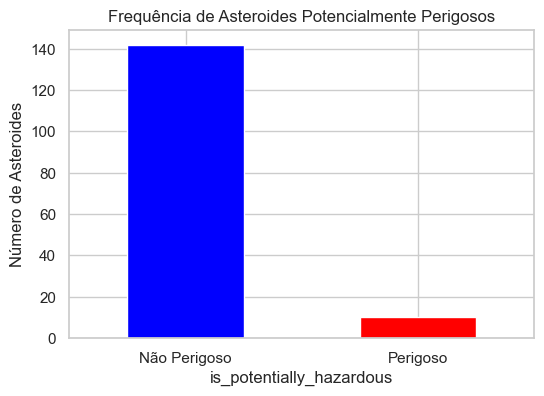

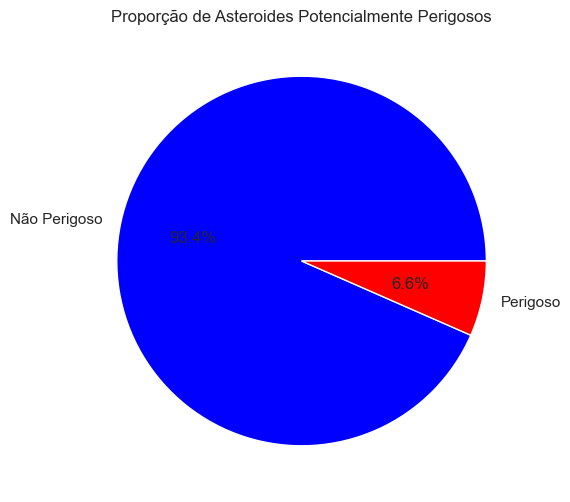

In [50]:
import matplotlib.pyplot as plt

# Contar a frequência de asteroides perigosos e não perigosos
hazardous_counts = df_asteroids['is_potentially_hazardous'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 4))
hazardous_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Frequência de Asteroides Potencialmente Perigosos')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'], rotation=0)
plt.ylabel('Número de Asteroides')
plt.show()

# Gráfico de pizza
plt.figure(figsize=(6, 6))
hazardous_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], labels=['Não Perigoso', 'Perigoso'])
plt.title('Proporção de Asteroides Potencialmente Perigosos')
plt.ylabel('')  # Remove o label do eixo Y
plt.show()

is_potentially_hazardous  False  True 
distance_range                        
<0.01 UA                      6      0
0.01-0.1 UA                  31      2
0.1-1 UA                    105      8
1-10 UA                       0      0
>10 UA                        0      0


/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/2873351939.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_proportions = df_asteroids.groupby(['distance_range', 'is_potentially_hazardous']).size().unstack()


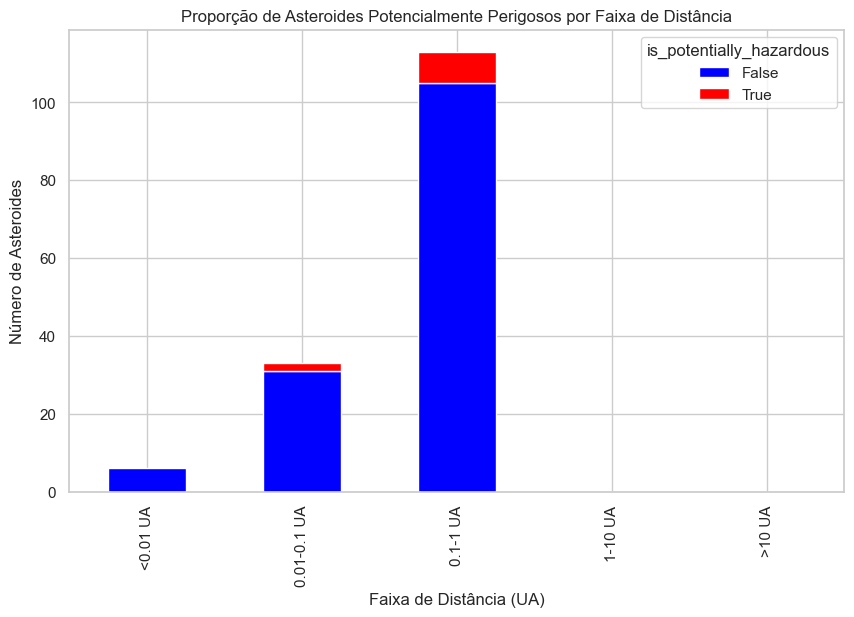

In [57]:
# Garantir que a coluna 'miss_distance_astronomical' esteja no formato numérico
df_asteroids['miss_distance_astronomical'] = pd.to_numeric(df_asteroids['miss_distance_astronomical'], errors='coerce')

# Definir faixas de distância
bins = [0, 0.01, 0.1, 1, 10, 100]
labels = ['<0.01 UA', '0.01-0.1 UA', '0.1-1 UA', '1-10 UA', '>10 UA']

# Criar uma nova coluna com as faixas de distância
df_asteroids['distance_range'] = pd.cut(df_asteroids['miss_distance_astronomical'], bins=bins, labels=labels)

# Contar a proporção de asteroides perigosos e não perigosos em cada faixa de distância
distance_proportions = df_asteroids.groupby(['distance_range', 'is_potentially_hazardous']).size().unstack()

# Exibir a tabela de proporções
print(distance_proportions)

# Gráfico de barras empilhadas para visualização
distance_proportions.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10, 6))
plt.title('Proporção de Asteroides Potencialmente Perigosos por Faixa de Distância')
plt.xlabel('Faixa de Distância (UA)')
plt.ylabel('Número de Asteroides')
plt.show()

Quer dizer que asteroides em faixas parecidas podem, ser classificados como perigosos ou não.

Então apenas a distância absoluta entre a distância de erro não é o bastante para classificar
ou não como perigoso 

Correlação - Faixa 0.01-0.1 UA:
is_potentially_hazardous     1.000000
estimated_diameter_max_km    0.677456
estimated_diameter_min_km    0.677456
relative_velocity_km_s       0.453476
absolute_magnitude          -0.567273
Name: is_potentially_hazardous, dtype: float64

Correlação - Faixa 0.1-1 UA:
is_potentially_hazardous     1.000000
estimated_diameter_min_km    0.227037
estimated_diameter_max_km    0.227037
relative_velocity_km_s       0.198934
absolute_magnitude          -0.325324
Name: is_potentially_hazardous, dtype: float64


/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/3191802131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixa_1['is_potentially_hazardous'] = faixa_1['is_potentially_hazardous'].astype(int)
/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/3191802131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixa_2['is_potentially_hazardous'] = faixa_2['is_potentially_hazardous'].astype(int)


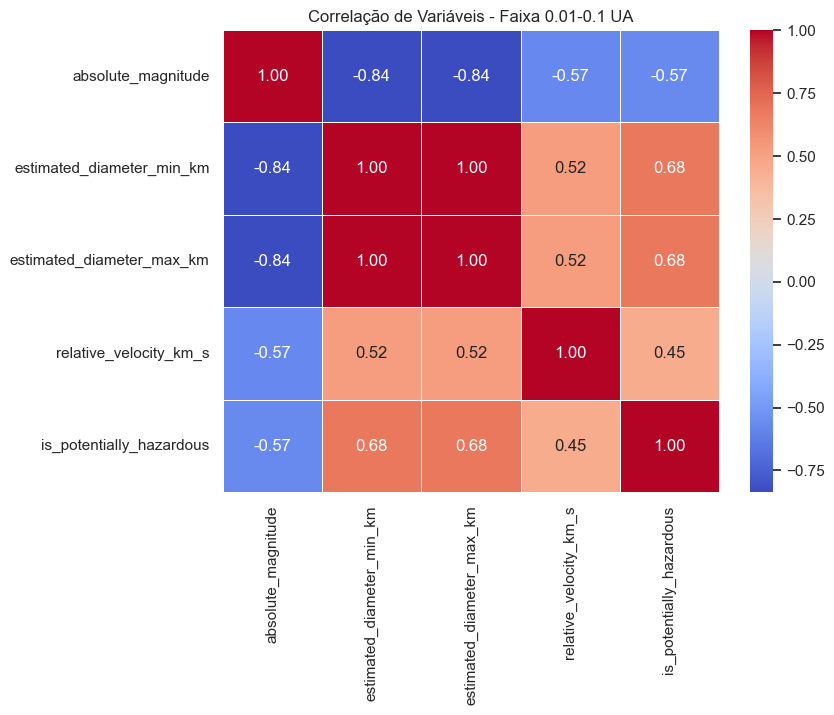

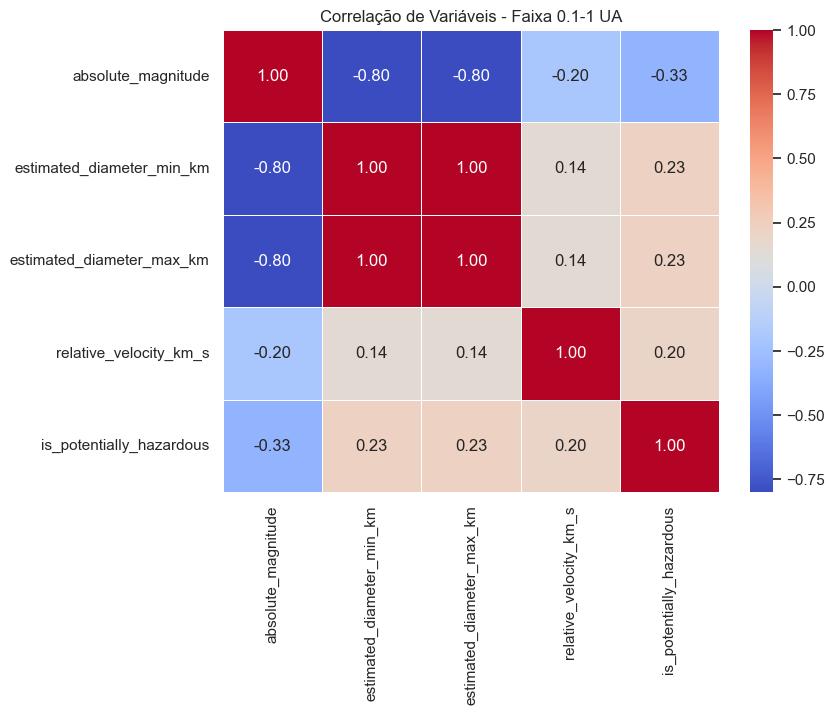

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separar asteroides na faixa de 0.01-0.1 UA e 0.1-1 UA
faixa_1 = df_asteroids[df_asteroids['distance_range'] == '0.01-0.1 UA']
faixa_2 = df_asteroids[df_asteroids['distance_range'] == '0.1-1 UA']

# Filtrar colunas numéricas relevantes para a análise
numeric_columns = ['absolute_magnitude', 'estimated_diameter_min_km', 'estimated_diameter_max_km', 'relative_velocity_km_s']

# Converter a coluna 'is_potentially_hazardous' para numérico (True = 1, False = 0)
faixa_1['is_potentially_hazardous'] = faixa_1['is_potentially_hazardous'].astype(int)
faixa_2['is_potentially_hazardous'] = faixa_2['is_potentially_hazardous'].astype(int)

# Analisar correlação entre variáveis numéricas e a variável 'is_potentially_hazardous' para a faixa 0.01-0.1 UA
print("Correlação - Faixa 0.01-0.1 UA:")
correlation_faixa_1 = faixa_1[numeric_columns + ['is_potentially_hazardous']].corr()
print(correlation_faixa_1['is_potentially_hazardous'].sort_values(ascending=False))

# Analisar correlação entre variáveis numéricas e a variável 'is_potentially_hazardous' para a faixa 0.1-1 UA
print("\nCorrelação - Faixa 0.1-1 UA:")
correlation_faixa_2 = faixa_2[numeric_columns + ['is_potentially_hazardous']].corr()
print(correlation_faixa_2['is_potentially_hazardous'].sort_values(ascending=False))

# Visualizar correlação com um heatmap para a faixa 0.01-0.1 UA
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_faixa_1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação de Variáveis - Faixa 0.01-0.1 UA')
plt.show()

# Visualizar correlação com um heatmap para a faixa 0.1-1 UA
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_faixa_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação de Variáveis - Faixa 0.1-1 UA')
plt.show()

### Conclusões Baseadas nos Heatmaps

#### Faixa 0.01-0.1 UA:
1. **Diâmetro Estimado**:
   - Correlação Positiva Forte: As variáveis de diâmetro estimado (mínimo e máximo) têm uma correlação de **0.68** com `is_potentially_hazardous`. Asteroides maiores nesta faixa são mais propensos a serem classificados como perigosos.
   
2. **Magnitude Absoluta**:
   - Correlação Negativa Moderada: A magnitude absoluta tem correlação de **-0.57** com `is_potentially_hazardous`. Asteroides mais brilhantes tendem a ser considerados mais perigosos nesta faixa.

3. **Velocidade Relativa**:
   - Correlação Moderada: A velocidade relativa tem correlação de **0.45** com `is_potentially_hazardous`. Asteroides mais rápidos também tendem a ser classificados como perigosos, mas o impacto é menor comparado ao diâmetro.

#### Faixa 0.1-1 UA:
1. **Diâmetro Estimado**:
   - Correlação Positiva Baixa: Diâmetros estimados (mínimo e máximo) têm correlação baixa (**0.23**) com `is_potentially_hazardous`. O impacto do diâmetro nesta faixa é menor comparado à faixa mais próxima.

2. **Magnitude Absoluta**:
   - Correlação Negativa Fraca: A magnitude absoluta tem correlação de **-0.33** com `is_potentially_hazardous`. Asteroides mais brilhantes têm uma leve tendência a serem perigosos, mas o impacto é menor que na faixa mais próxima.

3. **Velocidade Relativa**:
   - Correlação Muito Fraca: A correlação da velocidade relativa é muito fraca (**0.20**), sugerindo que a velocidade tem pouca influência nesta faixa.

### Conclusões Gerais:
1. **Distâncias Menores (0.01-0.1 UA)**:
   - O diâmetro estimado e a magnitude absoluta são os fatores mais influentes na classificação de asteroides perigosos. Asteroides maiores e mais brilhantes são mais propensos a serem perigosos.
   - A velocidade relativa também tem uma correlação moderada, sugerindo que asteroides mais rápidos podem ser ligeiramente mais perigosos nessa faixa.

2. **Distâncias Maiores (0.1-1 UA)**:
   - O impacto do diâmetro e da magnitude absoluta é muito mais fraco, sugerindo que esses fatores são menos importantes em distâncias maiores.
   - A velocidade relativa tem pouca influência nesta faixa, indicando que não é um bom preditor de periculosidade.

### Conclusão Final:
- **Distância menor (0.01-0.1 UA)**: Diâmetro e brilho (magnitude absoluta) são determinantes para classificar asteroides como perigosos.
- **Distância maior (0.1-1 UA)**: Esses fatores têm uma influência mais fraca, e outros fatores podem contribuir para a classificação de periculosidade.

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixa_2['is_potentially_hazardous'] = faixa_2['is_potentially_hazardous'].astype(str)
/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_potentially_hazardous', y='estimated_diameter_min_km', data=faixa_2, palette=['blue', 'red'])


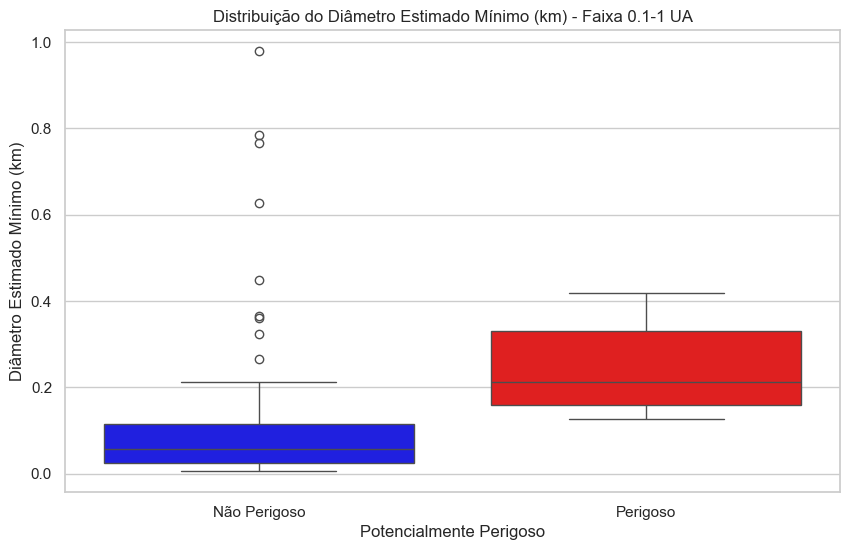

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_potentially_hazardous', y='estimated_diameter_max_km', data=faixa_2, palette=['blue', 'red'])


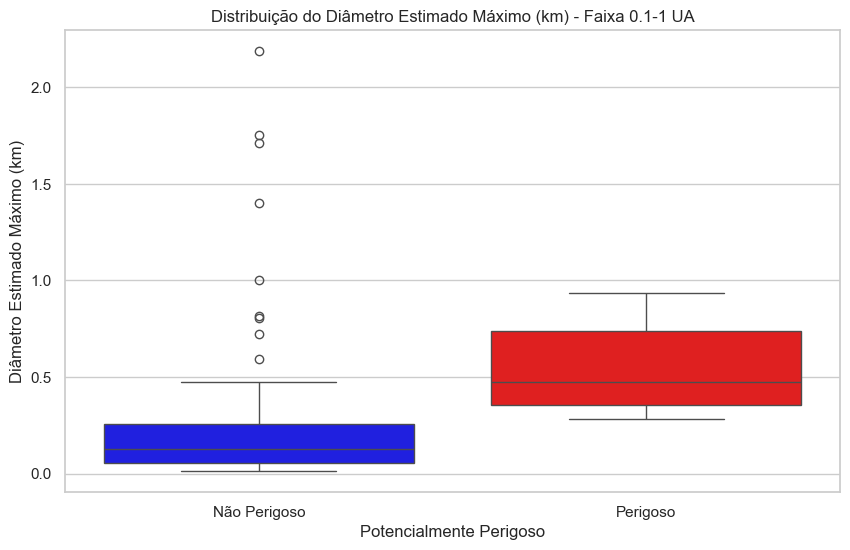

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_potentially_hazardous', y='absolute_magnitude', data=faixa_2, palette=['blue', 'red'])


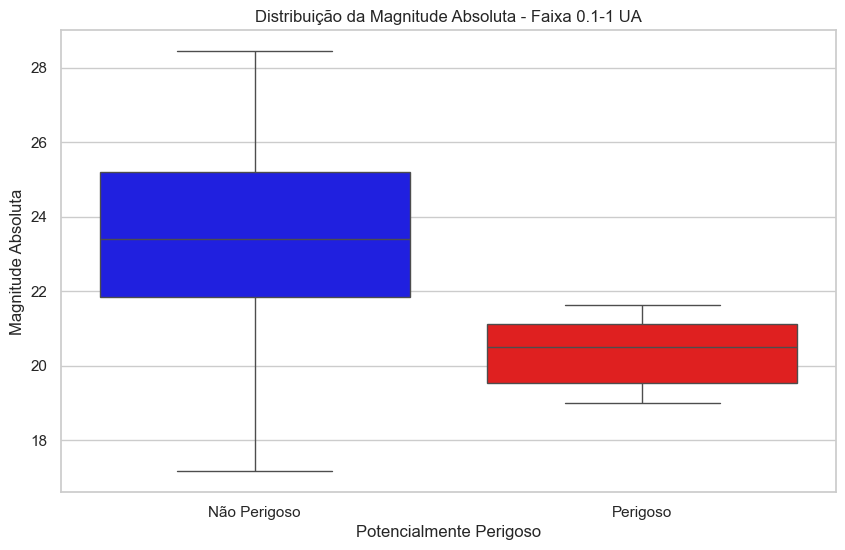

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_potentially_hazardous', y='relative_velocity_km_s', data=faixa_2, palette=['blue', 'red'])


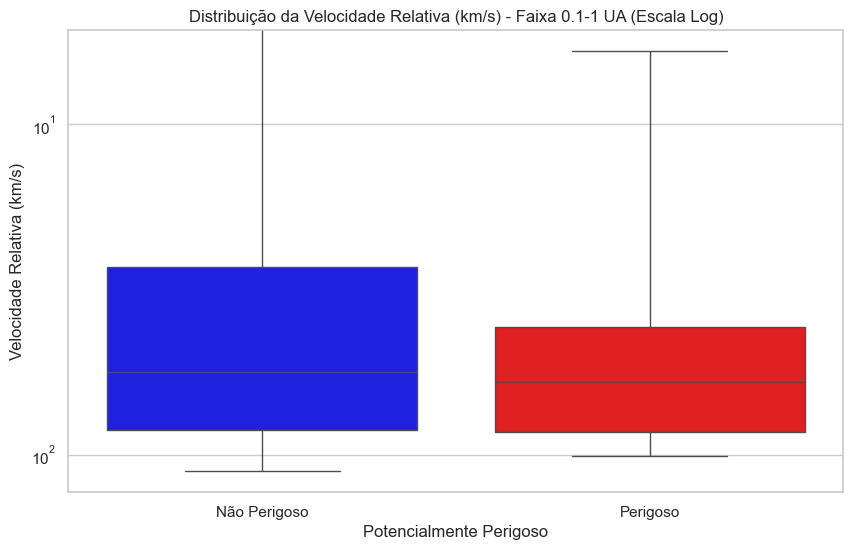

In [60]:
# Filtrar os asteroides na faixa de 0.1-1 UA
faixa_2 = df_asteroids[df_asteroids['distance_range'] == '0.1-1 UA']

# Converter a coluna 'is_potentially_hazardous' para string para facilitar a legenda nos boxplots
faixa_2['is_potentially_hazardous'] = faixa_2['is_potentially_hazardous'].astype(str)

# 1. Boxplot para o Diâmetro Estimado
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_potentially_hazardous', y='estimated_diameter_min_km', data=faixa_2, palette=['blue', 'red'])
plt.title('Distribuição do Diâmetro Estimado Mínimo (km) - Faixa 0.1-1 UA')
plt.xlabel('Potencialmente Perigoso')
plt.ylabel('Diâmetro Estimado Mínimo (km)')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_potentially_hazardous', y='estimated_diameter_max_km', data=faixa_2, palette=['blue', 'red'])
plt.title('Distribuição do Diâmetro Estimado Máximo (km) - Faixa 0.1-1 UA')
plt.xlabel('Potencialmente Perigoso')
plt.ylabel('Diâmetro Estimado Máximo (km)')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'])
plt.show()

# 2. Boxplot para Magnitude Absoluta
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_potentially_hazardous', y='absolute_magnitude', data=faixa_2, palette=['blue', 'red'])
plt.title('Distribuição da Magnitude Absoluta - Faixa 0.1-1 UA')
plt.xlabel('Potencialmente Perigoso')
plt.ylabel('Magnitude Absoluta')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'])
plt.show()

# Gráfico Boxplot para Velocidade Relativa com escala logarítmica no eixo Y
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_potentially_hazardous', y='relative_velocity_km_s', data=faixa_2, palette=['blue', 'red'])
plt.yscale('log')  # Aplicar escala logarítmica no eixo Y
plt.title('Distribuição da Velocidade Relativa (km/s) - Faixa 0.1-1 UA (Escala Log)')
plt.xlabel('Potencialmente Perigoso')
plt.ylabel('Velocidade Relativa (km/s)')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'])
plt.show()

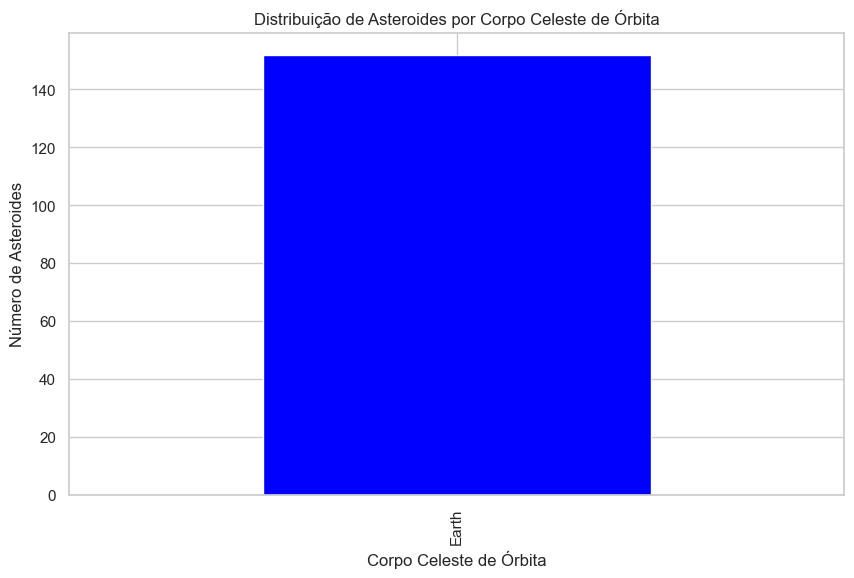

In [61]:
# Gráfico de barras para distribuição por corpo celeste de órbita
plt.figure(figsize=(10, 6))
df_asteroids['orbiting_body'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribuição de Asteroides por Corpo Celeste de Órbita')
plt.xlabel('Corpo Celeste de Órbita')
plt.ylabel('Número de Asteroides')
plt.show()

In [69]:
# Tabela das 10 maiores aproximações (menor miss_distance_km)
top_10_closest_approaches = df_asteroids[['name', 'miss_distance_km', 'close_approach_date', 'is_potentially_hazardous']].sort_values(by='miss_distance_km').head(10)

# Função para adicionar cor na coluna "is_potentially_hazardous"
def color_potentially_hazardous(val):
    if val:
        return 'color: red'
    else:
        return 'color: green'

# Exibir a tabela com a coluna colorida
styled_table_approaches = top_10_closest_approaches.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})

# Exibir a tabela sem índice
styled_table_approaches.set_table_attributes('style="border-collapse:collapse"').hide(axis='index')

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/755131694.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table_approaches = top_10_closest_approaches.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})


name,miss_distance_km,close_approach_date,is_potentially_hazardous
(2024 UG),1047210.760994492,2024-10-21,False
(2024 TX2),11408760.563400341,2024-10-18,False
(2024 TB22),11431290.975008496,2024-10-18,True
(2024 TM20),120590.483972112,2024-10-15,False
(2021 SF4),12117577.456824462,2024-10-21,False
(2022 UY),12175986.434227475,2024-10-16,False
(2024 TP3),13217941.253576961,2024-10-21,False
(2024 SA5),13328184.307197552,2024-10-19,False
(2024 ST2),13464372.493406918,2024-10-17,False
(2024 TY21),1351267.713699716,2024-10-19,False


In [70]:
# Tabela dos 10 asteroides mais rápidos (maior relative_velocity_km_s)
top_10_fastest_asteroids = df_asteroids[['name', 'relative_velocity_km_s', 'close_approach_date', 'is_potentially_hazardous']].sort_values(by='relative_velocity_km_s', ascending=False).head(10)

# Função para adicionar cor na coluna "is_potentially_hazardous"
def color_potentially_hazardous(val):
    if val:
        return 'color: red'
    else:
        return 'color: green'

# Exibir a tabela com a coluna colorida
styled_table_fastest = top_10_fastest_asteroids.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})

# Exibir a tabela sem índice
styled_table_fastest.set_table_attributes('style="border-collapse:collapse"').hide(axis='index')

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/993946553.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table_fastest = top_10_fastest_asteroids.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})


name,relative_velocity_km_s,close_approach_date,is_potentially_hazardous
(2021 TN6),9.9869841071,2024-10-17,False
(2021 XE6),9.6750353984,2024-10-22,False
483547 (2003 WM25),9.3986941342,2024-10-18,False
(2024 SV5),9.316170181,2024-10-19,False
(2024 UG),9.2351973073,2024-10-21,False
(2024 TC15),9.2205371483,2024-10-17,False
(2020 QP6),9.1153088486,2024-10-18,False
(2010 MA),8.5877838298,2024-10-18,False
(2024 TQ3),8.4878997567,2024-10-22,False
(2022 UY),8.3833190443,2024-10-16,False


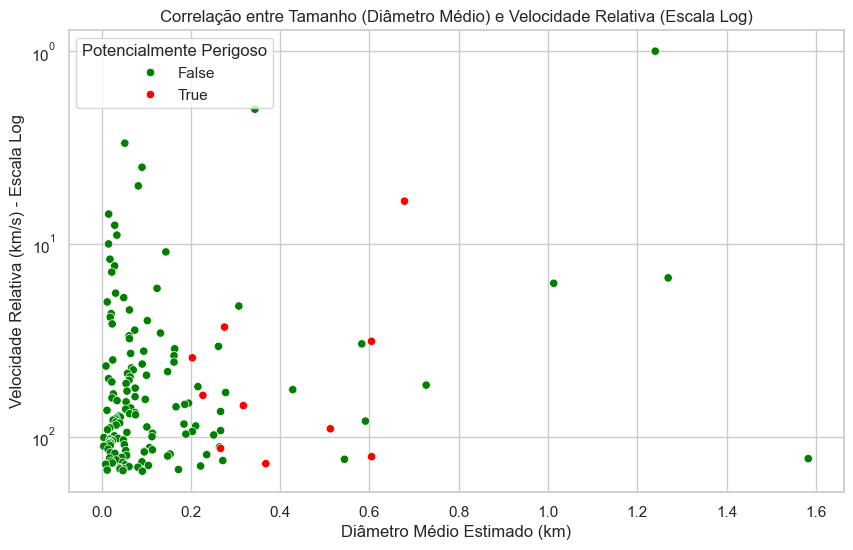

In [75]:
# Calcular o diâmetro médio
df_asteroids['estimated_diameter_avg_km'] = (df_asteroids['estimated_diameter_min_km'] + df_asteroids['estimated_diameter_max_km']) / 2

# Gráfico de dispersão entre diâmetro e velocidade relativa com escala logarítmica no eixo Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimated_diameter_avg_km', y='relative_velocity_km_s', data=df_asteroids, hue='is_potentially_hazardous', palette=['green', 'red'])
plt.yscale('log')  # Aplicar escala logarítmica no eixo Y
plt.title('Correlação entre Tamanho (Diâmetro Médio) e Velocidade Relativa (Escala Log)')
plt.xlabel('Diâmetro Médio Estimado (km)')
plt.ylabel('Velocidade Relativa (km/s) - Escala Log')
plt.legend(title='Potencialmente Perigoso')
plt.grid(True)
plt.show()

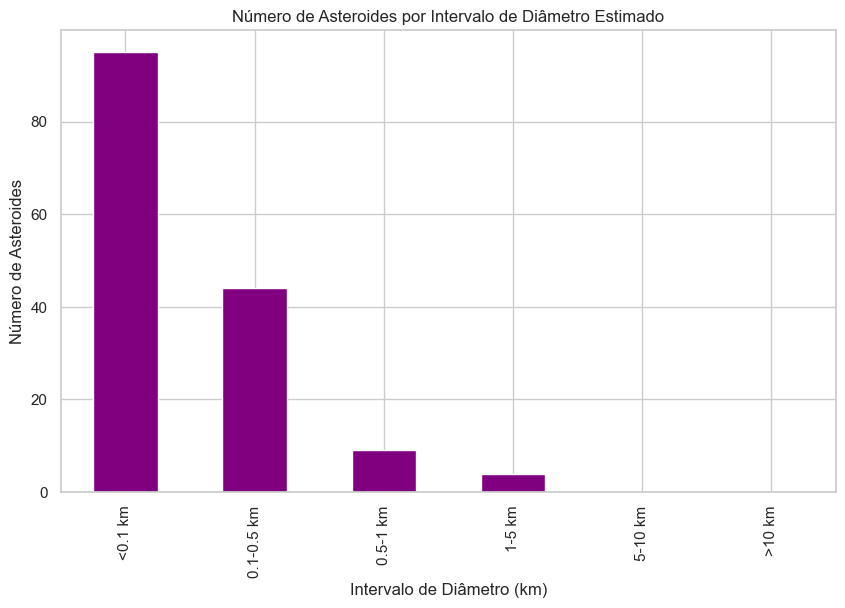

In [73]:
# Definir os intervalos de diâmetro
bins_diameter = [0, 0.1, 0.5, 1, 5, 10, 50]
labels_diameter = ['<0.1 km', '0.1-0.5 km', '0.5-1 km', '1-5 km', '5-10 km', '>10 km']

# Criar a coluna com os intervalos de diâmetro
df_asteroids['diameter_range'] = pd.cut(df_asteroids['estimated_diameter_avg_km'], bins=bins_diameter, labels=labels_diameter)

# Contar o número de asteroides por intervalo de diâmetro
diameter_counts = df_asteroids['diameter_range'].value_counts().sort_index()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
diameter_counts.plot(kind='bar', color='purple')
plt.title('Número de Asteroides por Intervalo de Diâmetro Estimado')
plt.xlabel('Intervalo de Diâmetro (km)')
plt.ylabel('Número de Asteroides')
plt.show()